In [1]:
import geopandas as gpd
from tqdm import tqdm
from shapely.validation import explain_validity
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import calendar
from itertools import cycle

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
os.chdir("../../scripts")
from clustering_operations import *
from HierarchicalClustering import HierarchicalClustering

%load_ext autoreload
%autoreload 2

In [3]:
file = "../data/shapefiles/FAPAN_level_08/FAPAN_level_08_inclusive.shp"    

# open file
shp = gpd.read_file(file)
df = pd.read_csv("../data/FAPAN_level_08.csv")

In [4]:
df

,HYBAS_ID,SUBIDs,1,2,3,4,5,6,7,8,...,195,196,197,198,199,200,201,202,203,204
0,2080000010,9000340.0,-1.479092,-1.461161,-1.453289,-1.481299,-1.449651,-1.545862,-1.579616,-1.687005,...,1.655333,1.592781,0.853791,1.173939,1.140341,1.228164,1.138968,0.679221,1.044652,1.435165
1,2080000020,"9000344.0,9713702.0,9700043.0,9713776.0,971381...",-1.406901,-0.914864,-1.192700,-1.651068,-1.315944,-1.199636,-1.514021,-1.586507,...,1.023926,0.891396,0.868111,1.481616,0.969563,0.567971,0.429654,0.156704,0.765227,1.056478
2,2080821360,"9713859.0,9713702.0,9714024.0,9713832.0,971381...",-1.239540,-0.557293,-0.952021,-1.703045,-1.187013,-0.877062,-1.342745,-1.419355,...,0.448246,0.336323,0.753999,1.503052,0.716340,0.047116,-0.145191,-0.258143,0.514468,0.838822
3,2080821500,"9714024.0,9713776.0,9713811.0,9713780.0,971377...",-1.029611,-0.322876,-0.500687,-1.814657,-0.985389,-0.548964,-1.317938,-1.342269,...,-0.417690,-0.296773,0.450436,1.495541,0.258709,-0.846089,-1.192913,-1.229586,-0.335856,0.180702
4,2080825220,"9713859.0,9713861.0,9714214.0,9713800.0,971402...",-1.096565,-0.503489,-0.693094,-1.746356,-1.104105,-0.832311,-1.422856,-1.410323,...,-0.656275,-0.578314,0.349352,1.003039,-0.138924,-1.150355,-1.225655,-1.343447,-0.768878,-0.336335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12839,2080105690,"9771166.0,9771836.0,9770470.0",-0.981948,-0.251976,0.444491,-0.132318,-0.188463,0.453576,-0.554370,-0.715559,...,-0.918402,0.410889,-1.431246,-1.150851,-0.064941,0.710615,1.288777,0.231332,-0.020182,0.734467
12840,2080107590,"9764402.0,9000238.0",-1.019098,-0.052282,-0.942337,-0.754362,-0.009741,-0.264754,-0.090526,-0.162343,...,-0.208991,1.233063,0.735531,0.617960,1.357895,1.792136,1.818193,0.903438,0.366109,0.166884
12841,2080108340,9756273.0,-0.402667,0.569556,-0.818222,-1.233444,-1.017000,-0.643000,NaN,NaN,...,0.575556,-0.347556,-0.450444,0.175000,NaN,NaN,0.199667,NaN,0.868111,2.466556
12842,2080109350,"9776792.0,9774632.0,9776294.0",-0.772045,-0.217212,0.504326,-0.479991,0.184217,1.190249,0.687144,0.295953,...,-1.212206,0.534920,0.710110,0.390497,-0.271523,0.764710,1.571699,0.748973,-0.344951,0.299180


In [5]:
shp['validity'] = shp.apply(lambda row: explain_validity(row.geometry), axis=1)
shp[shp['validity'] != 'Valid Geometry'].shape

(362, 16)

In [6]:
df = df.drop("SUBIDs", axis=1)
df = df.rename(columns={"HYBAS_ID" : "SUBID"})
shp = shp.rename(columns={"HYBAS_ID" : "SUBID"})
df

,SUBID,1,2,3,4,5,6,7,8,9,...,195,196,197,198,199,200,201,202,203,204
0,2080000010,-1.479092,-1.461161,-1.453289,-1.481299,-1.449651,-1.545862,-1.579616,-1.687005,-1.750921,...,1.655333,1.592781,0.853791,1.173939,1.140341,1.228164,1.138968,0.679221,1.044652,1.435165
1,2080000020,-1.406901,-0.914864,-1.192700,-1.651068,-1.315944,-1.199636,-1.514021,-1.586507,-1.357861,...,1.023926,0.891396,0.868111,1.481616,0.969563,0.567971,0.429654,0.156704,0.765227,1.056478
2,2080821360,-1.239540,-0.557293,-0.952021,-1.703045,-1.187013,-0.877062,-1.342745,-1.419355,-1.123469,...,0.448246,0.336323,0.753999,1.503052,0.716340,0.047116,-0.145191,-0.258143,0.514468,0.838822
3,2080821500,-1.029611,-0.322876,-0.500687,-1.814657,-0.985389,-0.548964,-1.317938,-1.342269,-0.887750,...,-0.417690,-0.296773,0.450436,1.495541,0.258709,-0.846089,-1.192913,-1.229586,-0.335856,0.180702
4,2080825220,-1.096565,-0.503489,-0.693094,-1.746356,-1.104105,-0.832311,-1.422856,-1.410323,-0.962048,...,-0.656275,-0.578314,0.349352,1.003039,-0.138924,-1.150355,-1.225655,-1.343447,-0.768878,-0.336335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12839,2080105690,-0.981948,-0.251976,0.444491,-0.132318,-0.188463,0.453576,-0.554370,-0.715559,-0.141985,...,-0.918402,0.410889,-1.431246,-1.150851,-0.064941,0.710615,1.288777,0.231332,-0.020182,0.734467
12840,2080107590,-1.019098,-0.052282,-0.942337,-0.754362,-0.009741,-0.264754,-0.090526,-0.162343,0.266483,...,-0.208991,1.233063,0.735531,0.617960,1.357895,1.792136,1.818193,0.903438,0.366109,0.166884
12841,2080108340,-0.402667,0.569556,-0.818222,-1.233444,-1.017000,-0.643000,NaN,NaN,-0.155000,...,0.575556,-0.347556,-0.450444,0.175000,NaN,NaN,0.199667,NaN,0.868111,2.466556
12842,2080109350,-0.772045,-0.217212,0.504326,-0.479991,0.184217,1.190249,0.687144,0.295953,0.711521,...,-1.212206,0.534920,0.710110,0.390497,-0.271523,0.764710,1.571699,0.748973,-0.344951,0.299180


<AxesSubplot:>

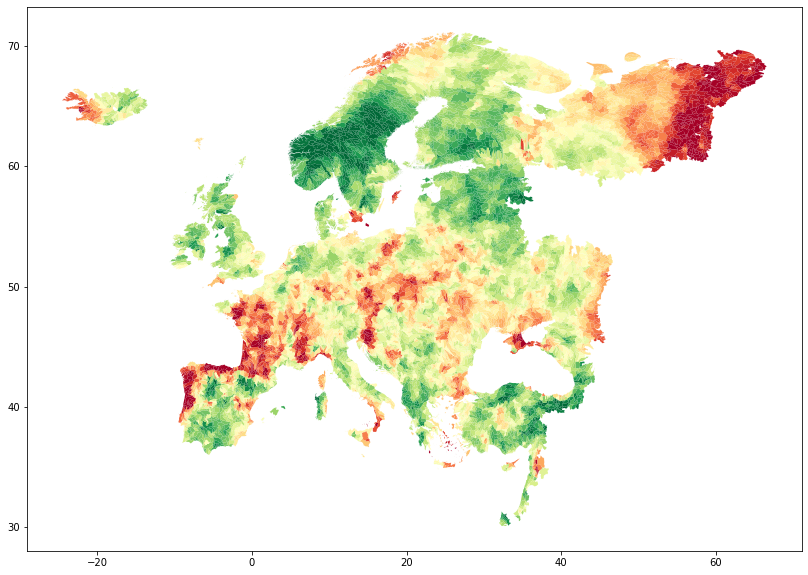

In [7]:
shp.plot(figsize=(16,10), column=df['198'], cmap='RdYlGn', vmin=-2, vmax=2)

In [8]:
# Calculate centroids
shp['centroid'] = shp['geometry'].centroid

# Extract latitude and longitude
shp['LATITUDE'] = shp['centroid'].apply(lambda centroid: centroid.y)
shp['LONGITUDE'] = shp['centroid'].apply(lambda centroid: centroid.x)

# Drop the 'centroid' column if needed
shp = shp.drop('centroid', axis=1)

/var/folders/6b/j2xt7shx2fq5nt2p9y46s3lh0000gn/T/ipykernel_63208/1722491891.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shp['centroid'] = shp['geometry'].centroid


In [9]:
df.insert(1, 'x', shp['LONGITUDE'])
#df['x'] = df['x'].astype(float)
df.insert(2, 'y', shp['LATITUDE'])
#df['y'] = df['y'].astype(float)

In [10]:
df.shape

(12844, 207)

In [11]:
def select_columns_by_months(dataframe, selected_months):
    selected_columns = []

    for i in range((dataframe.shape[1] - 3) // 12):
        selected_columns.extend([month + i * 12 for month in selected_months])

    all_columns = np.arange(1, dataframe.shape[1] - 2)
    columns_to_drop = np.setdiff1d(all_columns, np.array(selected_columns))
    columns_to_drop = [str(i) for i in columns_to_drop]

    filtered_dataframe = dataframe.drop(columns=columns_to_drop, axis=1)

    return filtered_dataframe

In [12]:
df = select_columns_by_months(df, [5,6,7,8,9])
df.shape

(12844, 88)

In [13]:
df_noNA = df.dropna()
df_noNA = df_noNA.reset_index(drop=True)
df_noNA.shape

(12052, 88)

In [14]:
shp_noNA = shp[shp['SUBID'].isin(df_noNA['SUBID'])]
shp_noNA = shp_noNA.reset_index(drop=True)
shp_noNA.shape

(12052, 18)

In [15]:
df_noNA

,SUBID,x,y,5,6,7,8,9,17,18,...,185,186,187,188,189,197,198,199,200,201
0,2080000010,32.296479,31.271897,-1.449651,-1.545862,-1.579616,-1.687005,-1.750921,-1.364220,-1.472670,...,1.672222,1.800685,1.506063,1.320623,1.237319,0.853791,1.173939,1.140341,1.228164,1.138968
1,2080000020,32.290885,30.859178,-1.315944,-1.199636,-1.514021,-1.586507,-1.357861,-1.206026,-1.494061,...,1.451995,1.332424,0.957218,0.785574,0.479194,0.868111,1.481616,0.969563,0.567971,0.429654
2,2080821360,32.673873,30.624427,-1.187013,-0.877062,-1.342745,-1.419355,-1.123469,-1.030122,-1.388079,...,1.069163,0.899674,0.348321,0.123454,-0.280132,0.753999,1.503052,0.716340,0.047116,-0.145191
3,2080821500,32.373886,30.673583,-0.985389,-0.548964,-1.317938,-1.342269,-0.887750,-0.973038,-1.353842,...,0.659447,0.459539,-0.287134,-0.622834,-1.559926,0.450436,1.495541,0.258709,-0.846089,-1.192913
4,2080825220,32.763740,30.428592,-1.104105,-0.832311,-1.422856,-1.410323,-0.962048,-0.918078,-1.442276,...,0.346243,0.278260,-0.520901,-0.879519,-1.624655,0.349352,1.003039,-0.138924,-1.150355,-1.225655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12047,2080105650,18.910622,42.949567,0.634871,0.355152,-0.681908,-0.228668,0.881811,0.849253,0.879915,...,-0.110949,0.887796,0.361309,-0.255277,-0.632704,1.896982,0.481202,0.642697,0.902052,0.884194
12048,2080105690,14.730193,40.859151,-0.188463,0.453576,-0.554370,-0.715559,-0.141985,0.488963,0.803655,...,0.620675,0.188922,-0.926773,-0.950550,-1.417666,-1.431246,-1.150851,-0.064941,0.710615,1.288777
12049,2080107590,28.175384,37.190442,-0.009741,-0.264754,-0.090526,-0.162343,0.266483,-0.195649,0.159684,...,0.700072,1.079254,0.812168,1.023237,1.190162,0.735531,0.617960,1.357895,1.792136,1.818193
12050,2080109350,15.346925,44.419900,0.184217,1.190249,0.687144,0.295953,0.711521,-0.429987,0.008991,...,0.488470,0.127189,-0.599158,-0.321116,-0.494851,0.710110,0.390497,-0.271523,0.764710,1.571699


## Compute neighbours

In [16]:
# add neighbours column
shp_noNA["NEIGHBOURS"] = None  
    
progress_bar = tqdm(total=shp_noNA.shape[0], position=0, leave=True, smoothing=0)

for index, country in shp_noNA.iterrows():   
    #print(index)
    # get 'not disjoint' countries
    neighbours = shp_noNA[~shp_noNA.geometry.disjoint(country.geometry)]['SUBID'].tolist()

    # remove own name of the country from the list
    neighbours = [ name for name in neighbours if country['SUBID'] != name ]

    # add names of neighbours as neighbours value
    shp_noNA.at[index, "NEIGHBOURS"] = neighbours
                   
    progress_bar.update(1)  

  0%|          | 0/12052 [00:00<?, ?it/s]

100%|█████████▉| 12046/12052 [02:44<00:00, 73.27it/s]

In [62]:
shp_sep = shp_august_noNA.copy()

In [563]:
shp_sep['NEIGHBOURS'] = shp_august_noNA['NEIGHBOURS'].apply(lambda x: ', '.join(map(str, x)) if x else '')  # Convert elements to string

In [564]:
shp_sep.to_file("../data/shapefiles/FAPAN_neighbours/august_noNA_dropped3/august_noNA_dropped3_droppedduplicate.shp")

In [17]:
# Create a set to store unique pairs
unique_pairs = set()

# Iterate over each row and generate pairs
for index, row in shp_noNA.iterrows():
    subid = row['SUBID']
    neighbors = row['NEIGHBOURS']
    
    # Generate pairs and add to the set
    for neighbor in neighbors:
        pair = tuple(sorted([subid, neighbor]))
        unique_pairs.add(pair)

In [18]:
neighbours = []
progress_bar = tqdm(total=len(unique_pairs), position=0, leave=True, smoothing=0)

for couple in unique_pairs:
    subid_x_y = [f"{df_noNA.loc[df_noNA['SUBID'] == subid, 'x'].values[0]}_{df_noNA.loc[df_noNA['SUBID'] == subid, 'y'].values[0]}" for subid in couple]
    neighbours.append(tuple(subid_x_y))
    
    progress_bar.update(1)

  0%|          | 93/34080 [00:00<04:45, 119.11it/s]

100%|██████████| 34080/34080 [01:48<00:00, 314.83it/s]

In [19]:
df_without_neighbours = shp_noNA[shp_noNA["NEIGHBOURS"].apply(len)==0][["LATITUDE", "LONGITUDE"]]
without_neighbours = ['{}_{}'.format(row['LONGITUDE'], row['LATITUDE']) for index, row in df_without_neighbours.iterrows()]

## Compute and visualize clusterings

In [20]:
df = df_noNA.copy()

transposed_df = df.T
df = pd.DataFrame(transposed_df.values, columns=[str(transposed_df.iloc[1, i]) + '_' + str(transposed_df.iloc[2, i]) for i in range(len(transposed_df.columns))])
df.drop([0, 1, 2], inplace=True)
df.reset_index(drop=True, inplace=True)

In [21]:
df = df.astype(float)

In [22]:
df.head()

,32.296478798287545_31.27189666211486,32.290885333395714_30.859177606030453,32.67387313204629_30.62442748326364,32.37388617128199_30.673582894431423,32.76373997991841_30.428592381441987,32.284997831550385_30.488958578737428,32.18836424124074_30.29804076514335,32.509291605945954_30.267664629437814,32.7505120733614_30.13222260397209,32.396061452825826_31.104905350877313,...,7.034178188519504_47.214297533465704,15.110151386607713_44.603409247899165,3.4086378813373317_44.233013667987116,3.1990732959067705_44.3224049114396,13.546290524396326_41.36443052214714,18.91062166406124_42.94956740334324,14.730193202054158_40.859150956868014,28.17538370521276_37.190442324666655,15.346925151299724_44.419900341913525,7.268767093618434_50.411809960984726
0,-1.449651,-1.315944,-1.187013,-0.985389,-1.104105,-1.090728,-1.392739,-1.149035,-1.460000,-1.453218,...,0.385239,-0.098006,-0.566227,-0.173271,0.131423,0.634871,-0.188463,-0.009741,0.184217,-0.098516
1,-1.545862,-1.199636,-0.877062,-0.548964,-0.832311,-0.919406,-1.424712,-0.975431,-1.416000,-1.465689,...,0.898384,0.920821,-0.030911,0.445322,-0.052019,0.355152,0.453576,-0.264754,1.190249,0.239096
2,-1.579616,-1.514021,-1.342745,-1.317938,-1.422856,-1.488773,-1.762760,-1.460263,-1.699333,-1.553932,...,1.017079,0.449244,0.292901,0.454190,-1.436285,-0.681908,-0.554370,-0.090526,0.687144,-0.382015
3,-1.687005,-1.586507,-1.419355,-1.342269,-1.410323,-1.400616,-1.538520,-1.403919,-1.591667,-1.622087,...,-0.223575,-0.449265,-0.486699,-0.393404,-0.681209,-0.228668,-0.715559,-0.162343,0.295953,-0.480030
4,-1.750921,-1.357861,-1.123469,-0.887750,-0.962048,-0.954979,-1.234392,-0.981137,-1.279000,-1.433058,...,-0.801424,0.492048,0.590977,0.600451,1.091139,0.881811,-0.141985,0.266483,0.711521,0.013923


df['13.9024_58.1193'] CONTIENE IL DUPLICATO

In [23]:
#df = df.loc[:,~df.columns.duplicated()]

In [24]:
def plot_clusters_shp(shapefile, clusters, figsize=(8,8)):
    shp = shapefile.copy()
    #shp = shp.drop("ClusterID", axis=1)
    #shp["CLUSTERID"] = 0  

    clusters_no_singletons = remove_singletons(clusters)
    singletons = clusters[len(clusters_no_singletons):]
    
    print(f'No. clusters (w/o singletons) = {len(clusters_no_singletons)}')
    print(f'No. singletons = {len(singletons)}')
        
    progress_bar = tqdm(total=shp.shape[0], position=0, leave=True, smoothing=0)

    clusterid = 0
    for cluster in clusters:
        for coordinate in cluster:
            coordinate = coordinate.split('_')
            shp.loc[((shp['LONGITUDE'] == float(coordinate[0])) & (shp['LATITUDE'] == float(coordinate[1]))), 'CLUSTERID'] = clusterid
                    
            progress_bar.update(1)
        
        clusterid += 1

    unique_cluster_ids = shp['CLUSTERID'].unique()
    num_unique_ids = len(unique_cluster_ids)
    seed_value = 45
    np.random.seed(seed_value)
    random_colors = np.random.rand(num_unique_ids, 3)  # RGB values

    # Create a dictionary to map CLUSTERID to its corresponding random color
    clusterid_to_color = dict(zip(unique_cluster_ids, random_colors))


    # Map each CLUSTERID to its corresponding random color

    shp['color'] = shp['CLUSTERID'].apply(lambda x: clusterid_to_color[x])

    shp.plot(figsize=figsize, color=shp['color'])

In [ ]:
clusters_corr08 = compute_clusters(df, neighbours, without_neighbours, method='correlation', threshold=0.8)

In [ ]:
for cluster in range(166):
    min_correlation = 1
    avg_correlation = 0
    length = len(clusters_corr08[cluster])
    
    for i in range(length-1):
        for j in range(i+1, length):
            correlation = np.corrcoef(df[clusters_corr08[cluster][i]], df[clusters_corr08[cluster][j]])[0][1]
            avg_correlation = avg_correlation + correlation
            if correlation < min_correlation:
                min_correlation = correlation
                points = (clusters_corr08[cluster][i], clusters_corr08[cluster][j])
    avg_correlation = avg_correlation / sum(range(1, length))      

    print(f'Cluster {cluster}')
    print(f'Avg. correlation : {avg_correlation}')            
    print(f'Min. correlation : {min_correlation}, between points : {points}')        

In [ ]:
plot_clusters_shp(shp_noNA, clusters_corr08, figsize=(16,16))

In [ ]:
clusters_corr085 = compute_clusters(df, neighbours, without_neighbours, method='correlation', threshold=0.85)

In [ ]:
plot_clusters_shp(shp_noNA, clusters_corr085, figsize=(16,16))

In [ ]:
clusters_corr09 = compute_clusters(df, neighbours, without_neighbours, method='correlation', threshold=0.9)

In [ ]:
plot_clusters_shp(shp_noNA, clusters_corr09, figsize=(16,16))

In [30]:
clustering = HierarchicalClustering(df, neighbours, without_neighbours, method='complete_correlation', threshold=0.5)
clustering.compute_clusters()

Computing neighbours strengths...


100%|██████████| 34080/34080 [00:27<00:00, 1252.35it/s]

Neighbours strengths computed.


Computing clusters...


12445it [5:47:50,  1.68s/it]                             

Clusters computed.


No. clusters (w/o singletons) = 1559
No. singletons = 125


100%|██████████| 12052/12052 [00:14<00:00, 843.02it/s] 


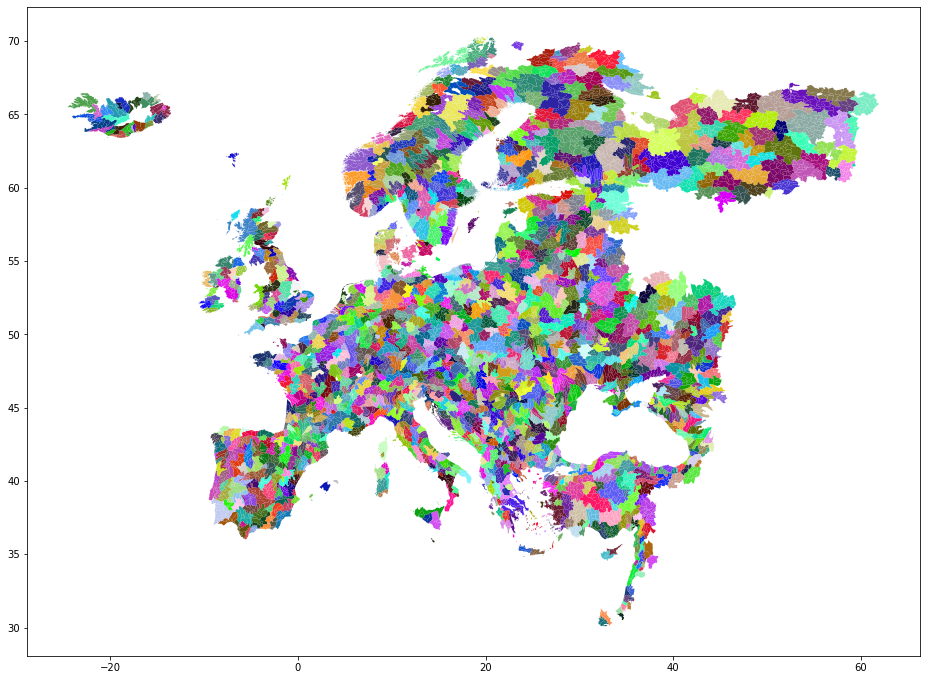

In [26]:
clusters = clustering.get_clusters_from_last_fathers(0.8)
plot_clusters_shp(shp_noNA, clusters, figsize=(16,16))

No. clusters (w/o singletons) = 2128
No. singletons = 204


100%|██████████| 12052/12052 [00:13<00:00, 884.74it/s] 


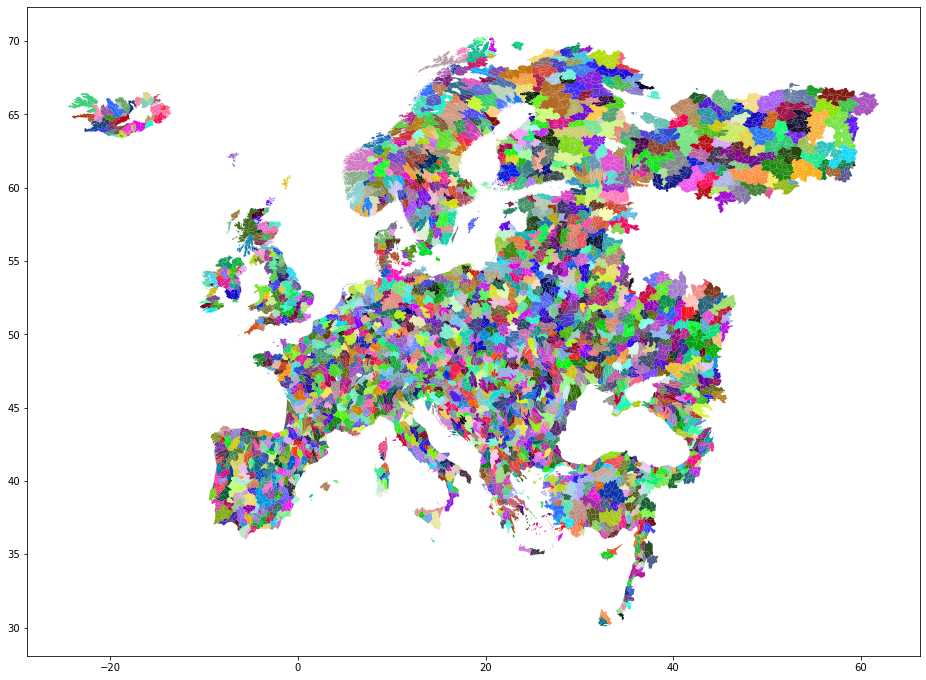

In [27]:
clusters = clustering.get_clusters_from_last_fathers(0.85)
plot_clusters_shp(shp_noNA, clusters, figsize=(16,16))

No. clusters (w/o singletons) = 3015
No. singletons = 463


100%|██████████| 12052/12052 [00:13<00:00, 888.69it/s] 


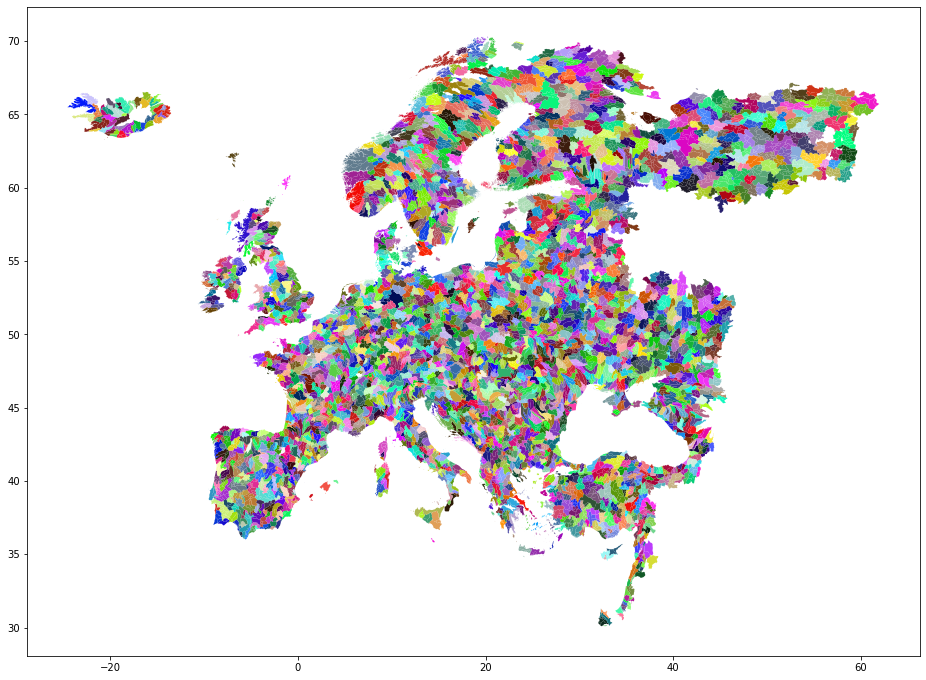

In [28]:
clusters = clustering.get_clusters_from_last_fathers(0.9)
plot_clusters_shp(shp_noNA, clusters, figsize=(16,16))

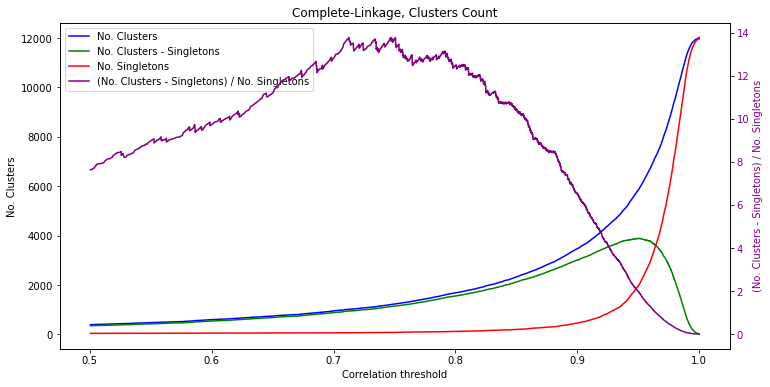

In [32]:
clustering.get_clustering_count_analysis()